In [1]:
import numpy
import seaborn as sns
from bootstrapper import Bootstrapper

In [2]:
sample1 = numpy.random.randn(10_000)
sample2 = numpy.random.power(0.05, 10_000)
print(sample1.mean(), sample2.mean())
# sample2 has larger mean.

def z_score(x):
    return (x - x.mean()) / numpy.std(x)

sample_statistics = sample1.mean() - sample2.mean()
b = Bootstrapper(bootstrap_count=1_000)

def mixing_bs_z(x, y):
    z = numpy.concatenate([z_score(x), z_score(y)])
    zx = numpy.random.choice(z, x.shape, replace=True)
    zy = numpy.random.choice(z, y.shape, replace=True)
    return zx.mean() - zy.mean()

null_mean_diffs = numpy.array(b.run(mixing_bs_z, sample1, sample2))
pvalue = (null_mean_diffs < sample_statistics).sum() / null_mean_diffs.shape
print(pvalue)

0.008138357120978176 0.04689255994507857
[0.006]


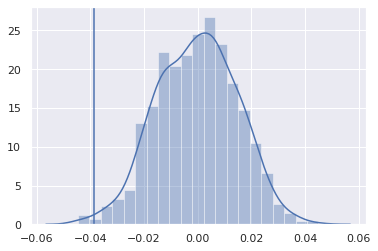

In [3]:
sns.set()
ax = sns.distplot(null_mean_diffs, kde=True);
ax.axvline(x=sample_statistics)